### Part A

In [345]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B

Importation of the necessary Libaries

In [346]:
# importing all the necessary libariesthat'll be used
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 
import seaborn as sns
import statistics

# importing all the classifiers that'll be experimented with
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report, confusion_matrix


In [347]:
Aenergy = pd.read_csv('/content/CE802_P2_Data.csv')
Aenergy

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,22.41900,-5.0520,9179.010,2.3940,-58.920,-5404.960,4.40693,-3.2322,-4.9938,0,...,-3649.27,-6.748800,-2141.760,0,10.27280,3501.20,2.04,16357.41,NaN,True
1,12.12414,-4.1046,4746.810,0.5664,-47.240,-5423.220,4.70780,-2.7708,-4.6814,1,...,4355.41,-14.178000,-1706.220,0,13.99800,3658.88,2.04,12350.85,NaN,False
2,13.47210,-3.8719,10700.820,2.4700,-15.010,-5334.180,4.42820,-5.0070,-6.2390,0,...,-3277.69,-7.728000,-2513.250,0,11.77800,3864.30,2.04,11482.11,NaN,True
3,12.60300,-3.7919,10553.667,2.3440,-28.216,-5446.240,8.59400,-4.1715,-5.0865,0,...,-2058.59,-5.573100,-2207.670,0,10.11020,2182.80,2.04,12662.52,NaN,True
4,19.83600,-4.6420,6456.810,7.8060,-45.620,-5460.670,4.78980,-1.6536,-4.7637,0,...,-3813.58,-3.828900,507.780,0,10.35120,3246.40,2.04,12121.71,15.52,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,14.08380,-4.9960,10155.510,5.2420,-20.982,-5462.268,4.52620,-2.8761,-5.4848,0,...,-3885.89,-3.799653,-1985.520,0,10.37440,2554.20,2.04,15038.61,NaN,False
996,13.66650,-4.3146,12121.110,1.4452,-116.300,-5485.286,4.51470,-2.3400,-4.7273,0,...,-3538.19,-4.375800,-2869.320,0,9.23880,3720.54,2.04,13332.21,NaN,False
997,12.87600,-3.6867,10724.040,3.7860,-27.924,-5450.136,5.53000,-5.3190,-6.8250,0,...,-2683.59,-5.184900,-2408.724,0,9.17134,-4036.00,0.04,12827.37,14.44,True
998,16.77900,-3.9024,10998.210,1.7188,-25.672,-5434.820,4.82050,-2.8479,-4.9253,0,...,-3578.79,-4.709700,-2378.829,1,10.41200,3007.00,0.04,13415.01,NaN,True


In [348]:
#Renaming the column titles  to better identify each features, where:

# Average Age of Household = Avg Age
# Number of Household =Household
# Average monthly electricity bill = Avg Bill
# Percentage of income spent on energy bills = % of Income
# Total square footage of home = Square of Home
# Credit score = Credit Score
# Number of rooms in home = No of rooms
# Number of years with current energy provider = Years with EP
# Number of years at current residence = Years at Res
# Access to government assistance =Govt. Ass
# Previous payment history = Payment Hist
# Number of appliances = Appliances
# Energy consumption history =Energy Hist
# Number of late payments in the past year =Late Payments
# Average Monthly  payment made  = Avg Amount
# Home ownership status = ownership
# Number of complaints to the energy provider =Complaints
# Average Daily energy consumption = Daily Consumption
# Number of energy-efficient upgrades made = Upgrades
# Monthly income = Income
# Home energy efficiency rating = Rating


Aenergy.columns = ['Avg. Age', 'Household', 'Avg Bill', '% of Income', 'Square of Home','Credit Score', 'No. of rooms', 
                  'Years with EP', 'Years at Res.', 'Govt. Ass.','Payment Hist.', 'Appliances',
                  'Energy Hist.', 'Late Payments', 'Avg. Amount', 'Ownership', 'Complaints', 
                  'Daily Consumption', 'Upgrades', 'Income','Rating', 'Prediction']
Aenergy


,Avg. Age,Household,Avg Bill,% of Income,Square of Home,Credit Score,No. of rooms,Years with EP,Years at Res.,Govt. Ass.,...,Energy Hist.,Late Payments,Avg. Amount,Ownership,Complaints,Daily Consumption,Upgrades,Income,Rating,Prediction
0,22.41900,-5.0520,9179.010,2.3940,-58.920,-5404.960,4.40693,-3.2322,-4.9938,0,...,-3649.27,-6.748800,-2141.760,0,10.27280,3501.20,2.04,16357.41,NaN,True
1,12.12414,-4.1046,4746.810,0.5664,-47.240,-5423.220,4.70780,-2.7708,-4.6814,1,...,4355.41,-14.178000,-1706.220,0,13.99800,3658.88,2.04,12350.85,NaN,False
2,13.47210,-3.8719,10700.820,2.4700,-15.010,-5334.180,4.42820,-5.0070,-6.2390,0,...,-3277.69,-7.728000,-2513.250,0,11.77800,3864.30,2.04,11482.11,NaN,True
3,12.60300,-3.7919,10553.667,2.3440,-28.216,-5446.240,8.59400,-4.1715,-5.0865,0,...,-2058.59,-5.573100,-2207.670,0,10.11020,2182.80,2.04,12662.52,NaN,True
4,19.83600,-4.6420,6456.810,7.8060,-45.620,-5460.670,4.78980,-1.6536,-4.7637,0,...,-3813.58,-3.828900,507.780,0,10.35120,3246.40,2.04,12121.71,15.52,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,14.08380,-4.9960,10155.510,5.2420,-20.982,-5462.268,4.52620,-2.8761,-5.4848,0,...,-3885.89,-3.799653,-1985.520,0,10.37440,2554.20,2.04,15038.61,NaN,False
996,13.66650,-4.3146,12121.110,1.4452,-116.300,-5485.286,4.51470,-2.3400,-4.7273,0,...,-3538.19,-4.375800,-2869.320,0,9.23880,3720.54,2.04,13332.21,NaN,False
997,12.87600,-3.6867,10724.040,3.7860,-27.924,-5450.136,5.53000,-5.3190,-6.8250,0,...,-2683.59,-5.184900,-2408.724,0,9.17134,-4036.00,0.04,12827.37,14.44,True
998,16.77900,-3.9024,10998.210,1.7188,-25.672,-5434.820,4.82050,-2.8479,-4.9253,0,...,-3578.79,-4.709700,-2378.829,1,10.41200,3007.00,0.04,13415.01,NaN,True


Exploratory Analysis

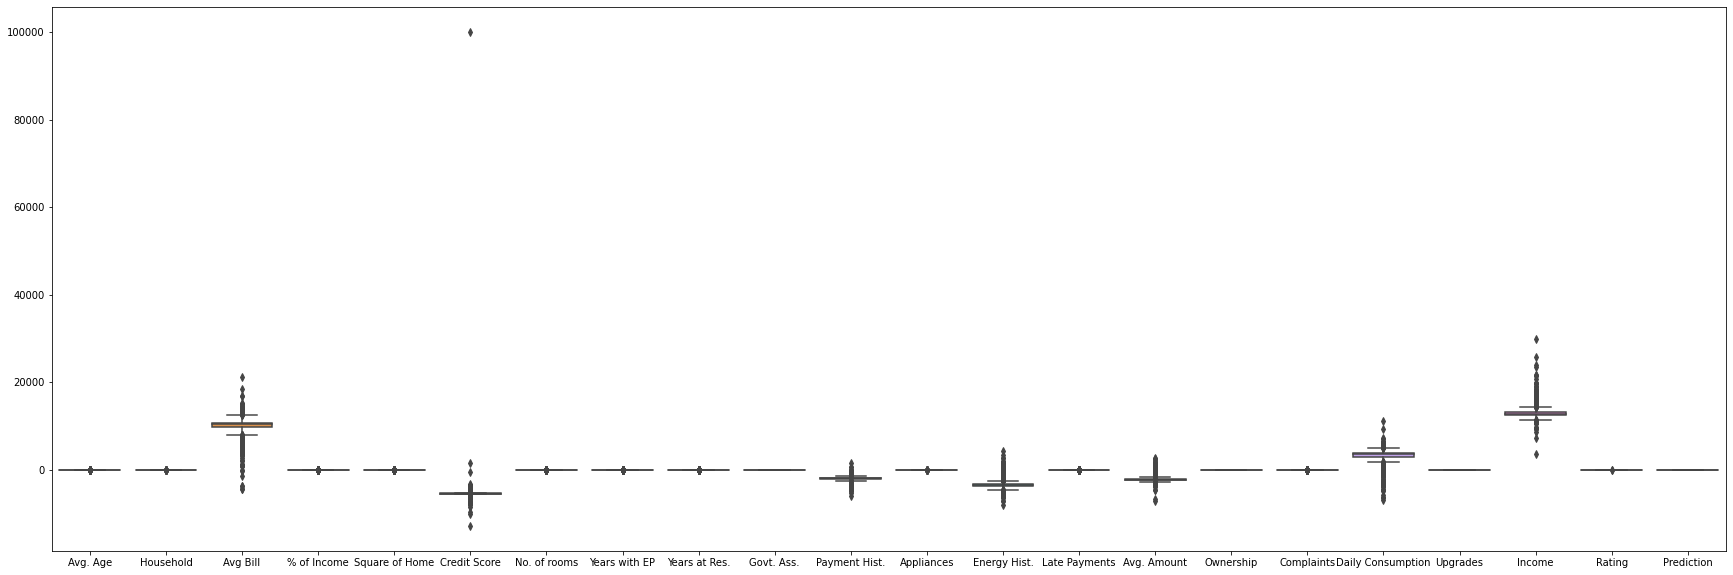

In [349]:
# visualizing the outliers
plt.figure(figsize=(30,10))
sns.boxplot(data=Aenergy)
plt.show()

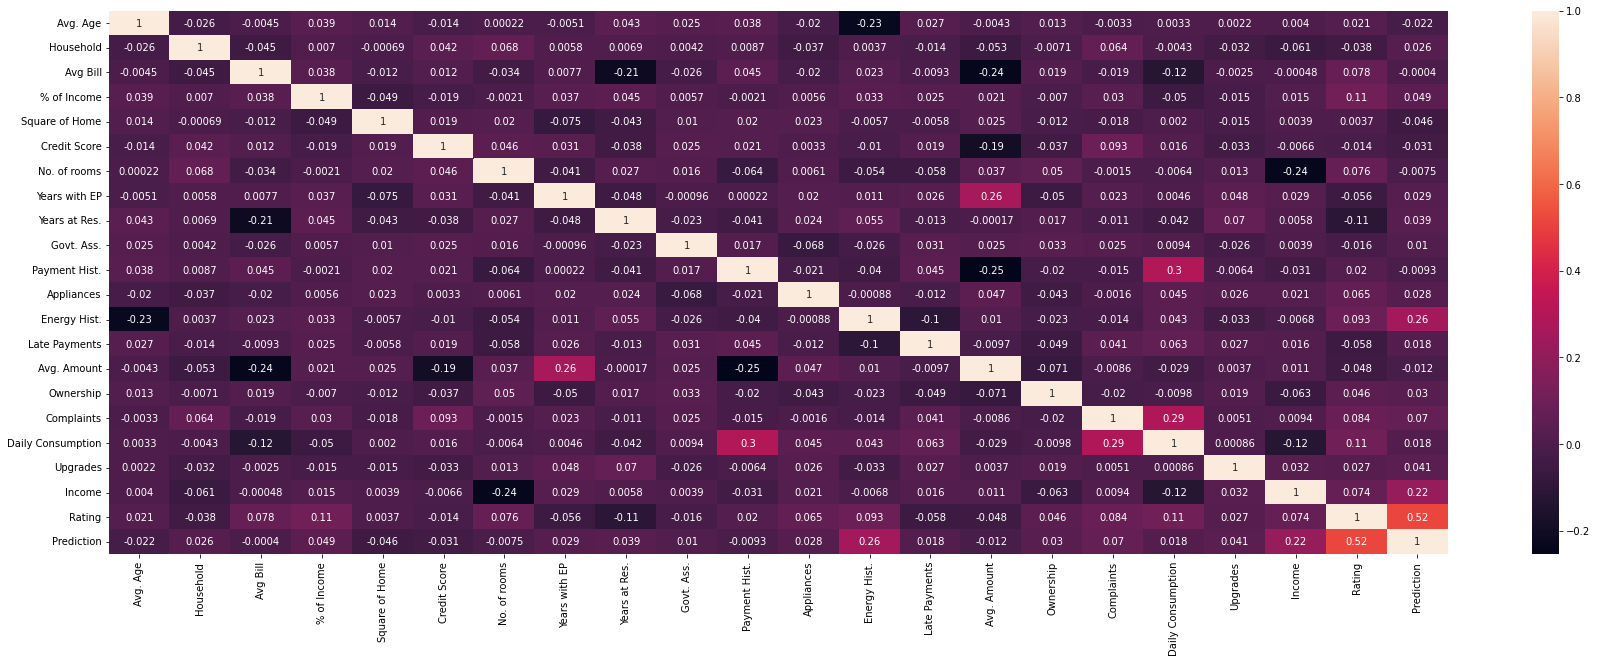

In [350]:
# Looking out for the correlation
plt.figure(figsize=(30,10))
sns.heatmap(Aenergy.corr(),annot=True)


In [351]:
#checking for any missing values in the data
Aenergy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Avg. Age           1000 non-null   float64
 1   Household          1000 non-null   float64
 2   Avg Bill           1000 non-null   float64
 3   % of Income        1000 non-null   float64
 4   Square of Home     1000 non-null   float64
 5   Credit Score       1000 non-null   float64
 6   No. of rooms       1000 non-null   float64
 7   Years with EP      1000 non-null   float64
 8   Years at Res.      1000 non-null   float64
 9   Govt. Ass.         1000 non-null   int64  
 10  Payment Hist.      1000 non-null   float64
 11  Appliances         1000 non-null   float64
 12  Energy Hist.       1000 non-null   float64
 13  Late Payments      1000 non-null   float64
 14  Avg. Amount        1000 non-null   float64
 15  Ownership          1000 non-null   int64  
 16  Complaints         1000 n

In [352]:
Aenergy.isnull().sum()

Avg. Age               0
Household              0
Avg Bill               0
% of Income            0
Square of Home         0
Credit Score           0
No. of rooms           0
Years with EP          0
Years at Res.          0
Govt. Ass.             0
Payment Hist.          0
Appliances             0
Energy Hist.           0
Late Payments          0
Avg. Amount            0
Ownership              0
Complaints             0
Daily Consumption      0
Upgrades               0
Income                 0
Rating               500
Prediction             0
dtype: int64

In [353]:
#with F21 column having 500 missing data, 
#three experiments will be carried out, to enable us determine the best computation for the missing values and the effect it has on the data to the result.

#Exp1 = dropping the F21 entire column
#dropping the F21 column
#Aenergy.drop(columns=['Rating'], inplace=True)

#Exp2 = imputation of the mean value of the F21 column
#Mean = Aenergy['Rating'].mean()
#Aenergy['Rating'].fillna(Mean, inplace=True)

#Exp3 = imputation of the median value of the F21 column
median = Aenergy['Rating'].median()
Aenergy['Rating'].fillna(median, inplace=True)

print (Aenergy)

     Avg. Age  Household   Avg Bill  % of Income  Square of Home  \
0    22.41900    -5.0520   9179.010       2.3940         -58.920   
1    12.12414    -4.1046   4746.810       0.5664         -47.240   
2    13.47210    -3.8719  10700.820       2.4700         -15.010   
3    12.60300    -3.7919  10553.667       2.3440         -28.216   
4    19.83600    -4.6420   6456.810       7.8060         -45.620   
..        ...        ...        ...          ...             ...   
995  14.08380    -4.9960  10155.510       5.2420         -20.982   
996  13.66650    -4.3146  12121.110       1.4452        -116.300   
997  12.87600    -3.6867  10724.040       3.7860         -27.924   
998  16.77900    -3.9024  10998.210       1.7188         -25.672   
999  15.22500    -4.3887  10698.930       1.2640         -24.464   

     Credit Score  No. of rooms  Years with EP  Years at Res.  Govt. Ass.  \
0       -5404.960       4.40693        -3.2322        -4.9938           0   
1       -5423.220       4.707

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


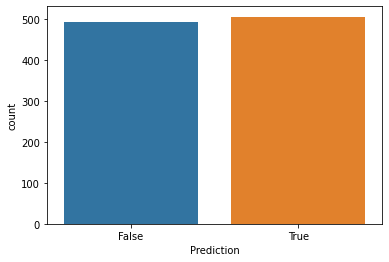

In [354]:
# showing the distribution of the true and false values
sns.countplot(Aenergy['Prediction'])

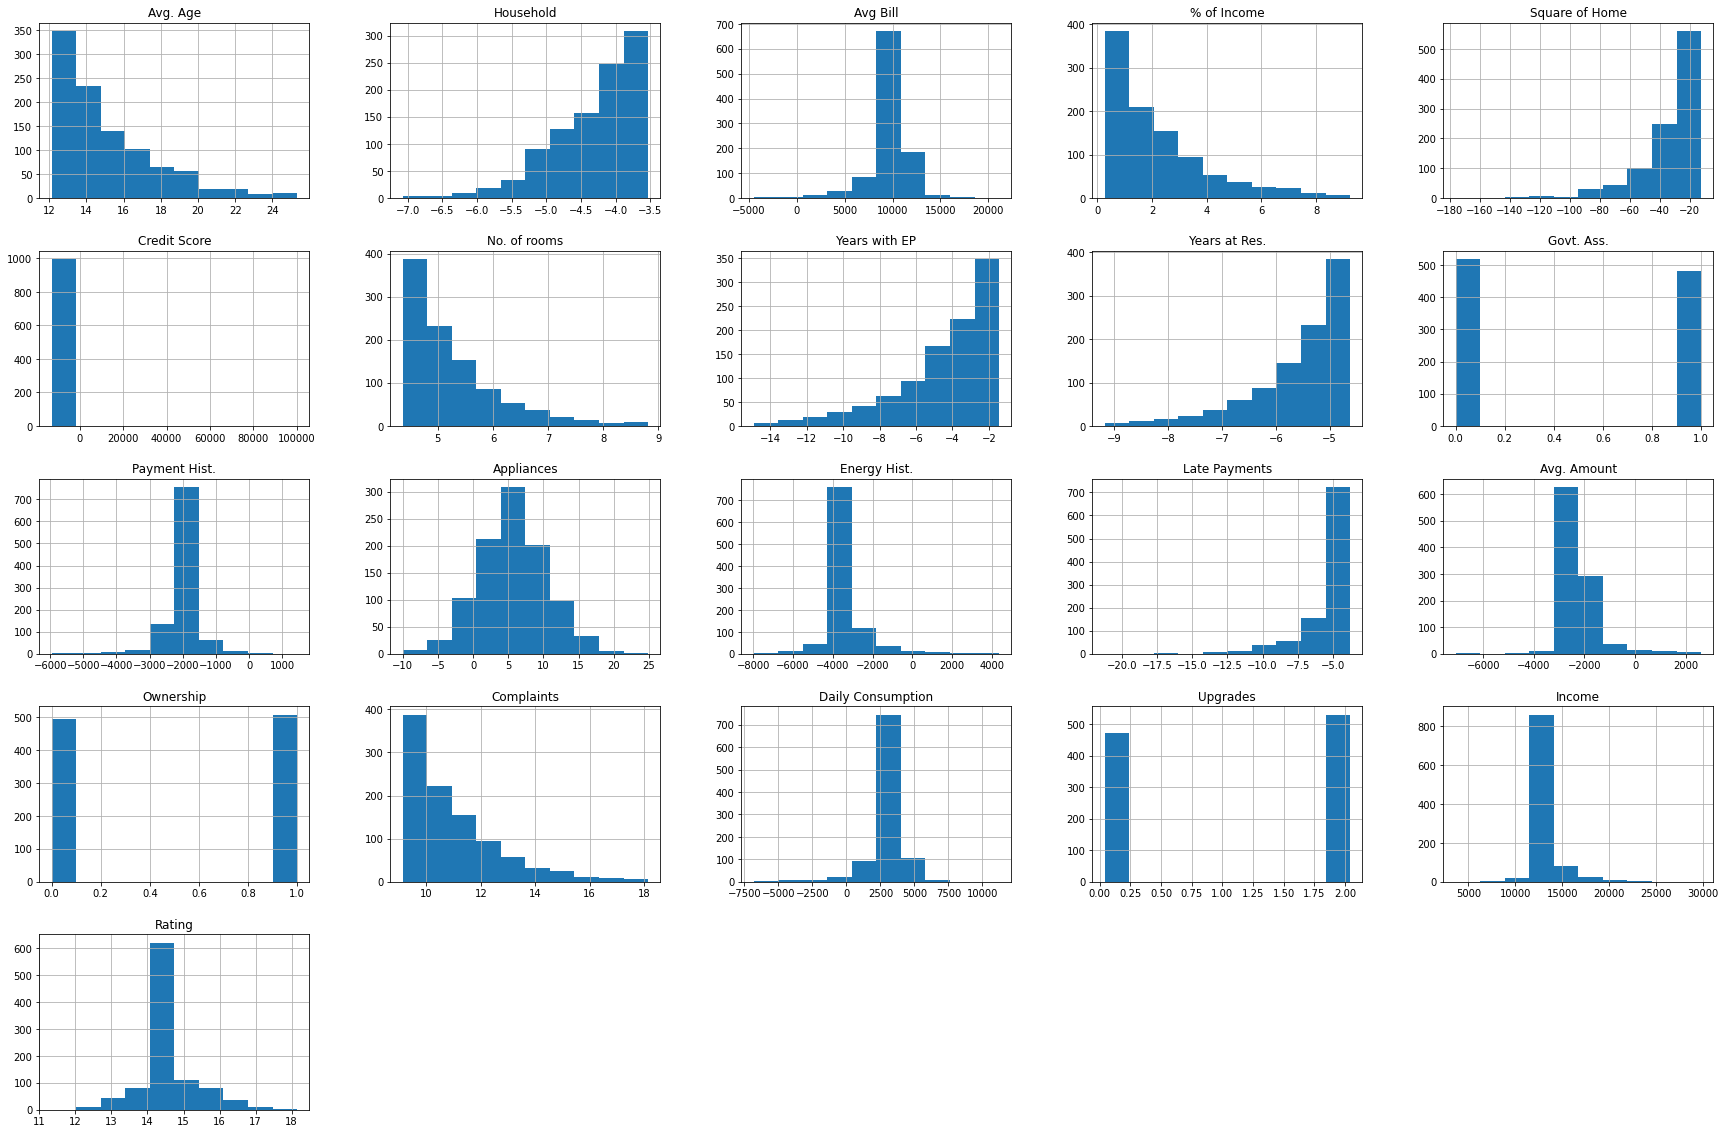

In [355]:
 # Visualizing the disttibution of  all the input columns using a histogram
Aenergy.hist(figsize = (30,20))
plt.show()

Data Pre-Processing


In [356]:
# #Replacing the values in the Prediction column to using label encoder

le = LabelEncoder()

# Fit and transform the 'column_name' column of the dataframe
Aenergy['Prediction'] = le.fit_transform(Aenergy['Prediction'])

In [357]:
Aenergy.head()

,Avg. Age,Household,Avg Bill,% of Income,Square of Home,Credit Score,No. of rooms,Years with EP,Years at Res.,Govt. Ass.,...,Energy Hist.,Late Payments,Avg. Amount,Ownership,Complaints,Daily Consumption,Upgrades,Income,Rating,Prediction
0,22.41900,-5.0520,9179.010,2.3940,-58.920,-5404.96,4.40693,-3.2322,-4.9938,0,...,-3649.27,-6.7488,-2141.76,0,10.2728,3501.20,2.04,16357.41,14.665,1
1,12.12414,-4.1046,4746.810,0.5664,-47.240,-5423.22,4.70780,-2.7708,-4.6814,1,...,4355.41,-14.1780,-1706.22,0,13.9980,3658.88,2.04,12350.85,14.665,0
2,13.47210,-3.8719,10700.820,2.4700,-15.010,-5334.18,4.42820,-5.0070,-6.2390,0,...,-3277.69,-7.7280,-2513.25,0,11.7780,3864.30,2.04,11482.11,14.665,1
3,12.60300,-3.7919,10553.667,2.3440,-28.216,-5446.24,8.59400,-4.1715,-5.0865,0,...,-2058.59,-5.5731,-2207.67,0,10.1102,2182.80,2.04,12662.52,14.665,1
4,19.83600,-4.6420,6456.810,7.8060,-45.620,-5460.67,4.78980,-1.6536,-4.7637,0,...,-3813.58,-3.8289,507.78,0,10.3512,3246.40,2.04,12121.71,15.520,0


In [358]:
Train_data= ((Aenergy-Aenergy.min()) / (Aenergy.max() -Aenergy.min()))
# checking if data has been normalized
(Train_data.min(), Train_data.max())
Train_data

,Avg. Age,Household,Avg Bill,% of Income,Square of Home,Credit Score,No. of rooms,Years with EP,Years at Res.,Govt. Ass.,...,Energy Hist.,Late Payments,Avg. Amount,Ownership,Complaints,Daily Consumption,Upgrades,Income,Rating,Prediction
0,0.779804,0.570273,0.534160,0.237160,0.716210,0.066374,0.010252,0.867299,0.918539,0.0,...,0.350796,0.829907,0.510282,0.0,0.127234,0.572382,1.0,0.487029,0.488253,1.0
1,0.000000,0.837870,0.361264,0.033632,0.787623,0.066212,0.077838,0.901585,0.987168,1.0,...,1.000000,0.404263,0.555215,0.0,0.539973,0.581119,1.0,0.333733,0.488253,0.0
2,0.102104,0.903596,0.593525,0.245623,0.984682,0.067000,0.015030,0.735419,0.644990,0.0,...,0.380933,0.773806,0.471956,0.0,0.294005,0.592502,1.0,0.300494,0.488253,1.0
3,0.036272,0.926193,0.587785,0.231592,0.903939,0.066008,0.950805,0.797502,0.898175,0.0,...,0.479805,0.897267,0.503482,0.0,0.109219,0.499324,1.0,0.345658,0.488253,1.0
4,0.584150,0.686079,0.427970,0.839859,0.797528,0.065881,0.096257,0.984601,0.969088,0.0,...,0.337470,0.997199,0.783627,0.0,0.135921,0.558262,1.0,0.324966,0.613803,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.148438,0.586091,0.572253,0.554323,0.948168,0.065866,0.037044,0.893760,0.810675,0.0,...,0.331606,0.998874,0.526400,0.0,0.138491,0.519905,1.0,0.436570,0.488253,0.0
996,0.116829,0.778554,0.648929,0.131498,0.365381,0.065663,0.034461,0.933596,0.977085,0.0,...,0.359805,0.965865,0.435221,0.0,0.012671,0.584536,1.0,0.371281,0.488253,0.0
997,0.056951,0.955907,0.594431,0.392178,0.905724,0.065974,0.262531,0.712235,0.516255,0.0,...,0.429116,0.919509,0.482740,0.0,0.005196,0.154716,0.0,0.351965,0.455213,1.0
998,0.352591,0.894982,0.605126,0.161967,0.919493,0.066109,0.103154,0.895855,0.933588,0.0,...,0.356513,0.946734,0.485824,1.0,0.142657,0.544996,0.0,0.374449,0.488253,1.0


In [359]:
# Identifying X as the input columns and Y as the resulting output
X = Train_data.drop('Prediction', axis=1)
Y = Train_data['Prediction']

# Spliting the data into a training and test sets with a 20% ratio for the test size using the train_test_split function 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)


Implementation of Learning Procedures on 3 models


In [360]:
#using a decision tree model
model1 = DecisionTreeClassifier()
# Training the model on the training data
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)

# Experimenting the model on the data
accuracy = accuracy_score(y_test, y_pred)

print(f'Train Accuracy: {accuracy:.2f}')


score_report = classification_report(y_test, y_pred, target_names=["Class 0","Class 1"])
print(score_report)

Train Accuracy: 0.84
              precision    recall  f1-score   support

     Class 0       0.83      0.85      0.84        99
     Class 1       0.85      0.83      0.84       101

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



In [361]:
model1_matrix = confusion_matrix(y_test,y_pred) 
print(model1_matrix)

[[84 15]
 [17 84]]


In [362]:
#using a K Neighbors Classifier
model2 = KNeighborsClassifier()

# Training the model on the training data
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

# Experimenting the model on the data
accuracy = accuracy_score(y_test, y_pred)

print(f'Train Accuracy: {accuracy:.2f}')

score_report = classification_report(y_test, y_pred, target_names=["Class 0","Class 1"])
print(score_report)

Train Accuracy: 0.64
              precision    recall  f1-score   support

     Class 0       0.62      0.70      0.66        99
     Class 1       0.66      0.58      0.62       101

    accuracy                           0.64       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.64      0.64      0.64       200



In [363]:
model2_matrix = confusion_matrix(y_test,y_pred) 
print(model2_matrix)

[[69 30]
 [42 59]]


In [364]:
#using a Random forest model
model3 = RandomForestClassifier()
# Training the model on the training data
model3.fit(x_train, y_train)
y_pred = model1.predict(x_test)

# Experimenting the model on the data
accuracy = accuracy_score(y_test, y_pred)

print(f'Train Accuracy: {accuracy:.2f}')

score_report = classification_report(y_test, y_pred, target_names=["Class 0","Class 1"])
print(score_report)

Train Accuracy: 0.84
              precision    recall  f1-score   support

     Class 0       0.83      0.85      0.84        99
     Class 1       0.85      0.83      0.84       101

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



In [365]:
model3_matrix = confusion_matrix(y_test,y_pred) 
print(model3_matrix)

[[84 15]
 [17 84]]


In [366]:
#Just to add, the model was tried on different imputations of the train data due to the missing values
#Running the decision tree model on:
#Exp1 resulted to 100% acccuracy
#Exp2  resulted to 100% acccuracy
#Exp3  resulted to 100% acccuracy


#Running the K Neighbors Model on:
#Exp1 resulted to 73% acccuracy
#Exp2  resulted to 75% acccuracy
#Exp3  resulted to 75% acccuracy


#Running the Random Forest Model on:
#Exp1 resulted to 100% acccuracy
#Exp2  resulted to 100% acccuracy
#Exp3  resulted to 100% acccuracy

#where:
#Exp1 = dropping the Rating entire column
#Exp2 = imputation of the mean value of the Rating column
#Exp2 = imputation of the median value of the Rating column

#Hence Exp2 of the Decision Tree model was the best

### Part B

In [367]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Loading the test data
test_df = pd.read_csv('/content/CE802_P2_Test.csv')
test_df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,12.19434,-4.04080,12708.210,0.8192,-26.0320,-5646.140,5.4150,-1.91220,-4.69020,0,...,668.41,-3.889080,-2164.230,0,10.7196,3054.800,0.04,12826.86,NaN,NaN
1,19.70700,-5.18200,9651.810,1.0418,-19.4540,-5541.680,5.2977,-6.02700,-5.70300,1,...,-3801.77,-3.981990,-2175.450,0,12.6300,3427.200,0.04,13053.51,14.37,NaN
2,13.80600,-5.71600,10903.710,0.4244,-50.7200,-5488.610,5.2426,-4.63500,-5.26470,0,...,-3133.29,-5.562300,-2533.920,1,11.4600,3663.620,2.04,13007.01,NaN,NaN
3,13.30020,-5.03500,10830.030,1.1048,-28.1660,-5395.760,4.6071,-1.56057,-5.96500,0,...,-4097.59,-4.521900,-1490.520,0,13.0920,3343.800,2.04,12465.30,NaN,NaN
4,14.20890,-3.56282,9547.110,3.0220,-38.2200,-5389.220,5.3580,-4.06650,-5.25200,1,...,-3419.89,-7.818000,-2260.410,1,14.2720,3763.838,2.04,12859.71,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.90840,-3.65420,10551.801,3.2120,-47.4200,-5456.602,6.9410,-1.79310,-7.91400,0,...,-3937.19,-4.667700,-1739.220,0,10.6118,3198.600,2.04,12511.56,15.32,NaN
996,14.11590,-3.55414,10907.610,2.5160,-60.1400,-5480.558,5.0525,-3.49680,-5.33470,1,...,-3574.09,-4.063680,-2418.507,0,9.7280,3155.000,0.04,12256.92,15.52,NaN
997,13.81770,-4.09350,10689.600,0.7696,-18.0840,-5493.040,7.3360,-8.34600,-5.31260,0,...,-3280.69,-7.314000,-2377.140,0,12.4480,3355.200,0.04,12722.64,16.17,NaN
998,12.93780,-4.47550,10108.710,2.6080,-24.1540,-5476.712,5.3160,-7.30800,-4.63681,0,...,-3401.79,-3.833070,-2376.030,0,14.2000,3676.300,0.04,12434.52,13.78,NaN


In [368]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1000 non-null   float64
 1   F2      1000 non-null   float64
 2   F3      1000 non-null   float64
 3   F4      1000 non-null   float64
 4   F5      1000 non-null   float64
 5   F6      1000 non-null   float64
 6   F7      1000 non-null   float64
 7   F8      1000 non-null   float64
 8   F9      1000 non-null   float64
 9   F10     1000 non-null   int64  
 10  F11     1000 non-null   float64
 11  F12     1000 non-null   float64
 12  F13     1000 non-null   float64
 13  F14     1000 non-null   float64
 14  F15     1000 non-null   float64
 15  F16     1000 non-null   int64  
 16  F17     1000 non-null   float64
 17  F18     1000 non-null   float64
 18  F19     1000 non-null   float64
 19  F20     1000 non-null   float64
 20  F21     500 non-null    float64
 21  Class   0 non-null      float64
dtypes

In [369]:
#renaming columns as of training data to avoid complications

test_df.columns = ['Avg. Age', 'Household', 'Avg Bill', '% of Income', 'Square of Home','Credit Score', 'No. of rooms', 
                  'Years with EP', 'Years at Res.', 'Govt. Ass.','Payment Hist.', 'Appliances',
                  'Energy Hist.', 'Late Payments', 'Avg. Amount', 'Ownership', 'Complaints', 
                  'Daily Consumption', 'Upgrades', 'Income','Rating', 'Prediction']

In [370]:

#Filling up the missing values in Rating with the median number so as to enable the model predict appropriately
test_df['Rating'].fillna(test_df['Rating'].median(), inplace = True)
test_df

,Avg. Age,Household,Avg Bill,% of Income,Square of Home,Credit Score,No. of rooms,Years with EP,Years at Res.,Govt. Ass.,...,Energy Hist.,Late Payments,Avg. Amount,Ownership,Complaints,Daily Consumption,Upgrades,Income,Rating,Prediction
0,12.19434,-4.04080,12708.210,0.8192,-26.0320,-5646.140,5.4150,-1.91220,-4.69020,0,...,668.41,-3.889080,-2164.230,0,10.7196,3054.800,0.04,12826.86,14.75,NaN
1,19.70700,-5.18200,9651.810,1.0418,-19.4540,-5541.680,5.2977,-6.02700,-5.70300,1,...,-3801.77,-3.981990,-2175.450,0,12.6300,3427.200,0.04,13053.51,14.37,NaN
2,13.80600,-5.71600,10903.710,0.4244,-50.7200,-5488.610,5.2426,-4.63500,-5.26470,0,...,-3133.29,-5.562300,-2533.920,1,11.4600,3663.620,2.04,13007.01,14.75,NaN
3,13.30020,-5.03500,10830.030,1.1048,-28.1660,-5395.760,4.6071,-1.56057,-5.96500,0,...,-4097.59,-4.521900,-1490.520,0,13.0920,3343.800,2.04,12465.30,14.75,NaN
4,14.20890,-3.56282,9547.110,3.0220,-38.2200,-5389.220,5.3580,-4.06650,-5.25200,1,...,-3419.89,-7.818000,-2260.410,1,14.2720,3763.838,2.04,12859.71,14.75,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.90840,-3.65420,10551.801,3.2120,-47.4200,-5456.602,6.9410,-1.79310,-7.91400,0,...,-3937.19,-4.667700,-1739.220,0,10.6118,3198.600,2.04,12511.56,15.32,NaN
996,14.11590,-3.55414,10907.610,2.5160,-60.1400,-5480.558,5.0525,-3.49680,-5.33470,1,...,-3574.09,-4.063680,-2418.507,0,9.7280,3155.000,0.04,12256.92,15.52,NaN
997,13.81770,-4.09350,10689.600,0.7696,-18.0840,-5493.040,7.3360,-8.34600,-5.31260,0,...,-3280.69,-7.314000,-2377.140,0,12.4480,3355.200,0.04,12722.64,16.17,NaN
998,12.93780,-4.47550,10108.710,2.6080,-24.1540,-5476.712,5.3160,-7.30800,-4.63681,0,...,-3401.79,-3.833070,-2376.030,0,14.2000,3676.300,0.04,12434.52,13.78,NaN


In [371]:


# # normalizing the data to be within the rangeof (0.0 to 1.0) using min-max scaler =(x-min(x))/(max(x)-min(x))
test_data= ((test_df-Aenergy.min()) / (test_df.max() -test_df.min()))
# checking if data has been normalized
(test_data.min(), test_data.max())
test_data

,Avg. Age,Household,Avg Bill,% of Income,Square of Home,Credit Score,No. of rooms,Years with EP,Years at Res.,Govt. Ass.,...,Energy Hist.,Late Payments,Avg. Amount,Ownership,Complaints,Daily Consumption,Upgrades,Income,Rating,Prediction
0,0.005337,0.946987,0.520707,0.061034,1.100800,0.391315,0.231866,0.951694,0.985328,0.0,...,0.700576,0.904512,0.342351,0.0,0.178936,0.519764,0.0,0.592149,0.463946,NaN
1,0.576468,0.590343,0.428299,0.085522,1.149065,0.396947,0.206054,0.650271,0.762812,1.0,...,0.338236,0.899667,0.341571,0.0,0.393235,0.539350,0.0,0.606740,0.412245,NaN
2,0.127859,0.423459,0.466150,0.017602,0.919657,0.399809,0.193930,0.752240,0.859108,0.0,...,0.392421,0.817256,0.316646,1.0,0.261990,0.551784,1.0,0.603747,0.463946,NaN
3,0.089407,0.636283,0.463922,0.092453,1.085143,0.404815,0.054090,0.977453,0.705250,0.0,...,0.314258,0.871512,0.389195,0.0,0.445059,0.534964,1.0,0.568874,0.463946,NaN
4,0.158489,1.096363,0.425134,0.303364,1.011373,0.405168,0.219323,0.793885,0.861899,1.0,...,0.369190,0.699625,0.335663,1.0,0.577425,0.557055,1.0,0.594264,0.463946,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.059621,1.067805,0.455510,0.324266,0.943870,0.401534,0.567658,0.960419,0.277047,0.0,...,0.327259,0.863908,0.371902,0.0,0.166844,0.527327,1.0,0.571852,0.541497,NaN
996,0.151418,1.099076,0.466268,0.247699,0.850540,0.400243,0.152099,0.835617,0.843729,1.0,...,0.356691,0.895407,0.324671,0.0,0.067704,0.525034,0.0,0.555460,0.568707,NaN
997,0.128749,0.930517,0.459676,0.055577,1.159117,0.399570,0.654577,0.480396,0.848584,0.0,...,0.380473,0.725908,0.327547,0.0,0.372819,0.535563,0.0,0.585440,0.657143,NaN
998,0.061856,0.811136,0.442113,0.257820,1.114580,0.400450,0.210081,0.556433,0.997058,0.0,...,0.370657,0.907433,0.327624,0.0,0.569349,0.552451,0.0,0.566893,0.331973,NaN


In [372]:
# identifying the input data and working on a copy
test_data = test_df.iloc[:,:-1].copy()

In [373]:

print(test_data.shape)


(1000, 21)


In [374]:
# Making predictions on the test data using the Decision Tree Model
predicted = model1.predict(test_data)
pred = pd.DataFrame(predicted)
pred[:15]

,0
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
5,1.0
6,0.0
7,0.0
8,1.0
9,0.0


In [375]:
# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = pred
test_df


,Avg. Age,Household,Avg Bill,% of Income,Square of Home,Credit Score,No. of rooms,Years with EP,Years at Res.,Govt. Ass.,...,Energy Hist.,Late Payments,Avg. Amount,Ownership,Complaints,Daily Consumption,Upgrades,Income,Rating,Prediction
0,12.19434,-4.04080,12708.210,0.8192,-26.0320,-5646.140,5.4150,-1.91220,-4.69020,0,...,668.41,-3.889080,-2164.230,0,10.7196,3054.800,0.04,12826.86,14.75,0.0
1,19.70700,-5.18200,9651.810,1.0418,-19.4540,-5541.680,5.2977,-6.02700,-5.70300,1,...,-3801.77,-3.981990,-2175.450,0,12.6300,3427.200,0.04,13053.51,14.37,0.0
2,13.80600,-5.71600,10903.710,0.4244,-50.7200,-5488.610,5.2426,-4.63500,-5.26470,0,...,-3133.29,-5.562300,-2533.920,1,11.4600,3663.620,2.04,13007.01,14.75,1.0
3,13.30020,-5.03500,10830.030,1.1048,-28.1660,-5395.760,4.6071,-1.56057,-5.96500,0,...,-4097.59,-4.521900,-1490.520,0,13.0920,3343.800,2.04,12465.30,14.75,0.0
4,14.20890,-3.56282,9547.110,3.0220,-38.2200,-5389.220,5.3580,-4.06650,-5.25200,1,...,-3419.89,-7.818000,-2260.410,1,14.2720,3763.838,2.04,12859.71,14.75,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.90840,-3.65420,10551.801,3.2120,-47.4200,-5456.602,6.9410,-1.79310,-7.91400,0,...,-3937.19,-4.667700,-1739.220,0,10.6118,3198.600,2.04,12511.56,15.32,0.0
996,14.11590,-3.55414,10907.610,2.5160,-60.1400,-5480.558,5.0525,-3.49680,-5.33470,1,...,-3574.09,-4.063680,-2418.507,0,9.7280,3155.000,0.04,12256.92,15.52,0.0
997,13.81770,-4.09350,10689.600,0.7696,-18.0840,-5493.040,7.3360,-8.34600,-5.31260,0,...,-3280.69,-7.314000,-2377.140,0,12.4480,3355.200,0.04,12722.64,16.17,0.0
998,12.93780,-4.47550,10108.710,2.6080,-24.1540,-5476.712,5.3160,-7.30800,-4.63681,0,...,-3401.79,-3.833070,-2376.030,0,14.2000,3676.300,0.04,12434.52,13.78,0.0


In [376]:
# Saving to the destination file
test_df.to_csv('CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')

In [377]:
# IMPORTANT!! Make sure only the last column has changed
assert test_df.iloc[:,:-1].equals(pd.read_csv('CE802_P2_Test_Predictions.csv').iloc[:,:-1])